# EDA - Exploratory Data Analysis

In [32]:
# Importing the required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Load the dataset into a pandas dataframe
data = pd.read_csv('E:\P288_Clustering_Project\P288_Group1_Clustering_Project_Excelr\Dataset\Cleaned_Dataset.csv')

# Creating a DataFrame with the loaded data
df = pd.DataFrame(data)

# checking the dataframe
df

Birth Rate  Business Tax Rate  CO2 Emissions                   Country  \
0          0.020              0.410        87931.0                   Algeria   
1          0.050              0.410         9542.0                    Angola   
2          0.043              0.410         1617.0                     Benin   
3          0.027              0.410         4276.0                  Botswana   
4          0.046              0.410         1041.0              Burkina Faso   
...          ...                ...            ...                       ...   
2699       0.020              0.410         8529.0  Turks and Caicos Islands   
2700       0.013              0.464         8529.0             United States   
2701       0.015              0.419         8529.0                   Uruguay   
2702       0.020              0.619         8529.0             Venezuela, RB   
2703       0.011              0.410         8529.0     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                       26.0              94.0       26998.0  5.479006e+10   
1                       26.0              94.0        7499.0  9.129595e+09   
2                       26.0              94.0        1983.0  2.359122e+09   
3                       26.0              94.0        1836.0  5.788312e+09   
4                       26.0              94.0       14338.0  2.610959e+09   
...                      ...               ...           ...           ...   
2699                    26.0              94.0       14338.0  1.507975e+10   
2700                     5.0               4.0     2132446.0  1.624460e+13   
2701                     7.0              85.0       14338.0  5.000435e+10   
2702                   144.0             180.0       14338.0  3.812862e+11   
2703                    26.0              94.0       14338.0  1.507975e+10   

      Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Male  \
0                0.035               60.0  ...                  67.0   
1                0.034               22.0  ...                  44.0   
2                0.043               15.0  ...                  53.0   
3                0.047              152.0  ...                  49.0   
4                0.051               12.0  ...                  49.0   
...                ...                ...  ...                   ...   
2699             0.061              193.0  ...                  69.0   
2700             0.179             8895.0  ...                  76.0   
2701             0.089             1308.0  ...                  74.0   
2702             0.046              593.0  ...                  72.0   
2703             0.061              193.0  ...                  76.0   

      Mobile Phone Usage  Number of Records  Population 0-14  \
0                    0.0                  1           0.3420   
1                    0.0                  1           0.4760   
2                    0.0                  1           0.4540   
3                    0.1                  1           0.3830   
4                    0.0                  1           0.4680   
...                  ...                ...              ...   
2699                 0.5                  1           0.2995   
2700                 1.0                  1           0.1960   
2701                 1.5                  1           0.2200   
2702                 1.0                  1           0.2880   
2703                 0.5                  1           0.2060   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0               0.6190           0.039          31719449             0.599   
1               0.4990           0.025          13924930             0.324   
2               0.5170           0.029           6949366             0.383   
3               0.5870           0.029           1755375             0.532   
4               0.5050           0.028          11607944             0.178   
...   

In [24]:
# checking if there are any null values present in the dataset

df.isna().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

In [25]:
for column in df.columns:
    fig = go.Figure()

    fig.add_trace(go.Histogram(x=df[column], name=column))

    min_val = df[column].min()
    max_val = df[column].max()

    fig.add_annotation(x=min_val, y=0,
                       text=f"Min: {min_val}",
                       showarrow=True,
                       arrowhead=1)

    fig.add_annotation(x=max_val, y=0,
                       text=f"Max: {max_val}",
                       showarrow=True,
                       arrowhead=1)
    fig.update_layout(title_text=column)

    fig.show()


In [26]:
for column in df.columns:
    fig = go.Figure()

    fig.add_trace(go.Box(y=df[column], name=column))

    min_val = df[column].min()
    max_val = df[column].max()

    fig.add_annotation(x=0, y=min_val,
                       text=f"Min: {min_val}",
                       showarrow=True,
                       arrowhead=1)

    fig.add_annotation(x=0, y=max_val,
                       text=f"Max: {max_val}",
                       showarrow=True,
                       arrowhead=1)

    fig.show()


""" As we can see that our data contains both outliers and is also not normally distributed as per Boxplot,Histograms respectively, Hence we have to do IQR capping and normalization technique to continue with the project"""

# IQR CAPPING

In [27]:
# Drop the 'Country' and 'GDP' columns
df = df.drop(['Birth Rate', 'Country', 'Ease of Business', 'Internet Usage','Number of Records' ,'Population 0-14' ,'Population Urban'], axis=1)

# Define a function to calculate the upper and lower fences for each column
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    return Lower_Fence, Upper_Fence

# Define a function to recode the outliers in each column
def recode_outliers(x):
    lower_fence, upper_fence = iqr_fence(x)
    x[x < lower_fence] = lower_fence
    x[x > upper_fence] = upper_fence
    return x

# Apply the function to each column to recode the outliers
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):  # only apply to numeric columns
        df[column] = recode_outliers(df[column])

# Save the resulting DataFrame to a new CSV file
df.to_csv('E:\P288_Clustering_Project\P288_Group1_Clustering_Project_Excelr\Dataset\IQR.csv', index=False)


In [28]:
# Load the dataset into a pandas dataframe
data = pd.read_csv('E:\P288_Clustering_Project\P288_Group1_Clustering_Project_Excelr\Dataset\IQR.csv')

# Creating a DataFrame with the loaded data
df = pd.DataFrame(data)

# checking the dataframe
df

Business Tax Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0                0.4100        87931.0                  26.000     26998.000   
1                0.4100         9542.0                  26.000      7499.000   
2                0.4100         1617.0                  26.000      1983.000   
3                0.4100         4276.0                  26.000      1836.000   
4                0.4100         1041.0                  26.000     14338.000   
...                 ...            ...                     ...           ...   
2699             0.4100         8529.0                  26.000     14338.000   
2700             0.4515         8529.0                   5.000     46913.625   
2701             0.4190         8529.0                   7.000     14338.000   
2702             0.4515         8529.0                  55.625     14338.000   
2703             0.4100         8529.0                  26.000     14338.000   

               GDP  Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0     5.479006e+10             0.035             60.000           239.00   
1     9.129595e+09             0.034             22.000           239.00   
2     2.359122e+09             0.043             15.000           239.00   
3     5.788312e+09             0.047            152.000           239.00   
4     2.610959e+09             0.051             12.000           239.00   
...            ...               ...                ...              ...   
2699  1.507975e+10             0.061            193.000           239.00   
2700  2.213750e+11             0.118           1291.125           189.75   
2701  5.000435e+10             0.089           1291.125           295.75   
2702  2.213750e+11             0.046            593.000           295.75   
2703  1.507975e+10             0.061            193.000           239.00   

      Infant Mortality Rate  Lending Interest  Life Expectancy Female  \
0                    0.0340            0.1000                    71.0   
1                    0.1075            0.2265                    47.0   
2                    0.0900            0.1200                    57.0   
3                    0.0540            0.1550                    52.0   
4                    0.0960            0.1200                    52.0   
...                     ...               ...                     ...   
2699                 0.0200            0.1200                    75.0   
2700                 0.0060            0.0330                    81.0   
2701                 0.0100            0.1120                    80.0   
2702                 0.0130            0.1640                    78.0   
2703                 0.0200            0.1200                    83.0   

      Life Expectancy Male  Mobile Phone Usage  Population 15-64  \
0                     67.0                 0.0            0.6190   
1                     44.0                 0.0            0.4990   
2                     53.0                 0.0            0.5170   
3                     49.0                 0.1            0.5870   
4                     49.0                 0.0            0.5050   
...                    ...                 ...               ...   
2699                  69.0                 0.5            0.6425   
2700                  76.0                 1.0            0.6670   
2701                  74.0                 1.5            0.6390   
2702                  72.0                 1.0            0.6520   
2703                  76.0                 0.5            0.6410   

      Population 65+  Population Total  Tourism Inbound  Tourism Outbound  
0              0.039      3.171945e+07     1.020000e+08      1.930000e+08  
1              0.025      1.392493e+07     3.400000e+07      1.460000e+08  
2              0.029      6.949366e+06     7.700000e+07      5.000000e+07  
3              0.029      1.755375e+06     2.270000e+08      2.090000e+08  
4              0.028      1.160794e+07     2.300000e+07   

In [29]:
for column in df.columns:
    fig = go.Figure()

    fig.add_trace(go.Box(y=df[column], name=column))

    min_val = df[column].min()
    max_val = df[column].max()

    fig.add_annotation(x=0, y=min_val,
                       text=f"Min: {min_val}",
                       showarrow=True,
                       arrowhead=1)

    fig.add_annotation(x=0, y=max_val,
                       text=f"Max: {max_val}",
                       showarrow=True,
                       arrowhead=1)

    fig.show()

# Normalization

In [30]:
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [31]:
for column in df.columns:
    fig = go.Figure()

    fig.add_trace(go.Histogram(x=df[column], name=column))

    min_val = df[column].min()
    max_val = df[column].max()

    fig.add_annotation(x=min_val, y=0,
                       text=f"Min: {min_val}",
                       showarrow=True,
                       arrowhead=1)

    fig.add_annotation(x=max_val, y=0,
                       text=f"Max: {max_val}",
                       showarrow=True,
                       arrowhead=1)
    fig.update_layout(title_text=column)

    fig.show()

<Axes: >

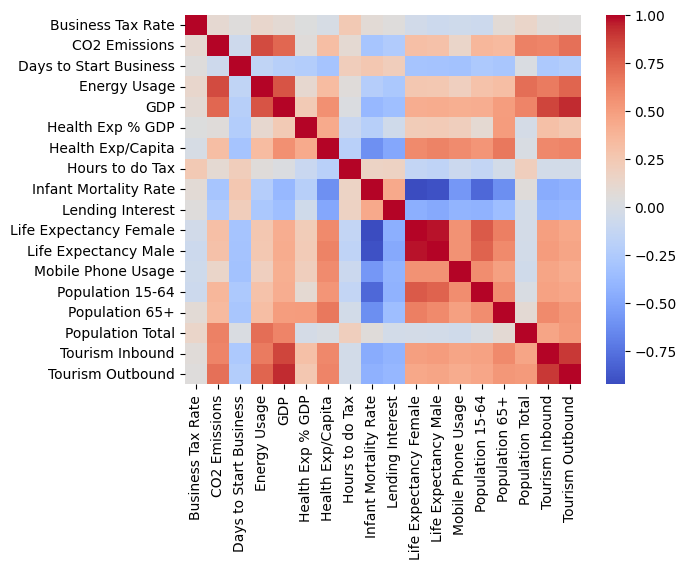

In [33]:
# Create a correlation matrix
corr_matrix = df.corr()

# Create the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')

In [34]:
fig = px.imshow(df.corr(), x=df.columns, y=df.columns, color_continuous_scale='Viridis')
fig.show()


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a correlation matrix
corr_matrix = df.corr()

# Calculate VIF for each variable
vif = pd.DataFrame()
vif['variable'] = corr_matrix.columns
vif['VIF'] = [variance_inflation_factor(corr_matrix.values, i) for i in range(corr_matrix.shape[1])]

# Print variables with VIF greater than 5
high_vif_vars = vif[vif['VIF'] > 5]['variable'].tolist()
if high_vif_vars:
    print(f"The following variables have a VIF greater than 5: {', '.join(high_vif_vars)}")
else:
    print("No variables have a VIF greater than 5.")


The following variables have a VIF greater than 5: CO2 Emissions, Energy Usage, GDP, Health Exp % GDP, Health Exp/Capita, Infant Mortality Rate, Lending Interest, Life Expectancy Female, Life Expectancy Male, Mobile Phone Usage, Population 15-64, Population 65+, Population Total, Tourism Inbound, Tourism Outbound
